In [ ]:
#CLASSIFICADORES
#Pipeline (Transformações necessárias sobre os dados)
#1. Balancear (depois)
#2. Normalizar (depois)
#3. Determinar os hiperparâmetros (depois)
#4. Treinar o modelo
#5. Avaliar a acurácia do modelo+


In [1]:
import warnings
warnings.filterwarnings("ignore")


#Abrir os dados
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/fertility_Diagnosis.txt')

#1. Balancear
#Frequencia de classes conforme os dados originais
# print('Freq das classes original: ', dados.Output.value_counts())
#Aplicar SMOTE (técnica que amplia a frequenca das classes menores sintetizando novas instancias e respeitando a probabilidade do segmento orinal de dados)
from imblearn.over_sampling import SMOTE
#Segmentar os dados em atrbutos e classes
dados_atributos = dados.drop(columns = ['Diagnostico'])
dados_classes = dados['Diagnostico']
#imprimir a frequencia das classes antes de balancear

print('Frequencia de classes antes do balanceamento')
from collections import Counter
classes_count = Counter(dados_classes)
print(classes_count)

# #Construir um objeto a partir do SMOTE
resampler = SMOTE()
# #Executar o balanceamento
dados_atributos_b, dados_classes_b = resampler.fit_resample(dados_atributos, dados_classes)

# #Verificar a frequencia das clases após o balanceamento
print('Frequencia de classes após balanceamento')
from collections import Counter
classes_count = Counter(dados_classes_b)
print(classes_count)




SyntaxError: invalid syntax (<ipython-input-1-3a86368af7c8>, line 27)

In [ ]:
#4. Treinar

#4.2 Segmentar os dados em conjunto para treinamento e conjunto para testes (Test HoldOut)
from sklearn.model_selection import train_test_split
dados_atributos = dados_finais.drop(columns=['Output'])
dados_classe = dados_finais['Output']


atributos_train, atributos_test, classes_train, classes_test = train_test_split(dados_atributos, dados_classe, test_size = 0.3)

#4.3 Treinar o modelo
#Será usada uma árvore, mas que pode ser subistuída por outro indutor
from sklearn.tree import DecisionTreeClassifier #Importar o indutor da árvore de decisão
#construir um objeto a partir do indutor
tree = DecisionTreeClassifier()
#treinar o modelo
fertility_tree = tree.fit(atributos_train, classes_train)

#pretestar o modelo
Classe_test_predict = fertility_tree.predict(atributos_test)


#Comparar as clases inferidas no teste com as classes preservadas no split
i = 0
for i in range(0, len(classes_test)):
  print(classes_test.iloc[i][0], ' -  ', Classe_test_predict[i])

O  -   O
N  -   N
N  -   N
N  -   N
N  -   N
O  -   O
N  -   N
O  -   O
N  -   N
N  -   N
N  -   N
N  -   N
O  -   O
O  -   O
N  -   N
O  -   O
O  -   O
N  -   N
O  -   O
N  -   N
N  -   N
O  -   N
O  -   O
O  -   O
O  -   O
N  -   N
N  -   N
N  -   N
N  -   N
N  -   N
O  -   O
O  -   O
N  -   N
N  -   N
O  -   O
O  -   O
O  -   O
O  -   O
O  -   O
O  -   O
N  -   N
O  -   O
O  -   O
N  -   N
N  -   N
O  -   O
N  -   O
N  -   O
O  -   O
N  -   N
N  -   N
N  -   N
O  -   N


In [ ]:
#Acurácia global do modelo
from sklearn import metrics
print('Acurácia global (provisória):', metrics.accuracy_score(classes_test,Classe_test_predict))

Acurácia global (provisória): 0.8113207547169812


<function matplotlib.pyplot.show(*args, **kw)>

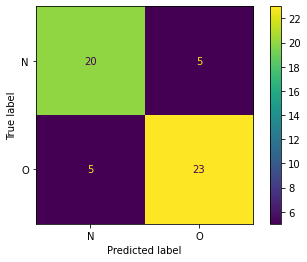

In [ ]:
#MATRIZ DE CONTINGÊNCIA
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix #para o gráfico
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(fertility_tree, atributos_test, classes_test)
plt.show

In [ ]:
#Imprimir a matriz de contingência
print(confusion_matrix(classes_test, Classe_test_predict, labels=fertility_tree.classes_))

In [ ]:
#Salvar o modelo para uso posterior
from pickle import dump
dump(fertility_tree, open('fertiliy_tree_model.pkl', 'wb'))

In [ ]:
#AVALIAÇÃO DA ACURÁCIA COM CROSS-VALIDATION
from pprint import pprint
#1. Quando a avaliação é realizada com Cross_validation, dipensa-se o Split da base
from sklearn.tree import DecisionTreeClassifier
#Construir um objeto para representar o indutor
tree = DecisionTreeClassifier() #Construir o objeto do indutor

#2. Treinar o modelo
#2.1 Requitos:
#    a) dados normalizados e balancedados
#    b) dados segmentados em atributo e classes
fertility_tree_cross = tree.fit(dados_atributos_b, dados_classes_b)

#3. Avaliar a acurácia com Cross-Validation
from sklearn.model_selection import cross_validate, cross_val_score
scoring = ['precision_macro', 'recall_macro']
scores_cross = cross_validate(tree,dados_atributos_b,dados_classes_b, cv =10, scoring = scoring)
print(scores_cross['test_precision_macro'].mean())
print(scores_cross['test_recall_macro'].mean())
# scores_cross_val= cross_val_score(tree, dados_atributos_b, dados_classes_b, cv=10)
# print(scores_cross_val.mean(), ' - ', scores_cross_val.std())

0.867839937839938
0.8534722222222222


<function matplotlib.pyplot.show(*args, **kw)>

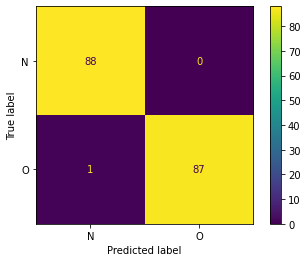

In [ ]:
#Matriz de contingência com o modelo avaliado com o cross-validation
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix #para o gráfico
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(fertility_tree_cross, dados_atributos_b,dados_classes_b)
plt.show

In [ ]:
#SALVAR O MODELO PARA USO POSTERIOR
from pickle import dump
dump(fertility_tree_cross, open('fertility_tree_cross.pkl', 'wb'))
